## Linear Systems

In [ ]:
import laguide as lag
import numpy as np
import scipy.linalg as sla
%matplotlib inline
import matplotlib.pyplot as plt

**Exercise 1:** Consider the system of equations given below. Find a value for the coefficient $a$ so that the system has exactly one solution. For that value of $a$, find the solution to the system of equations and plot the lines formed by your equations to check your answer.

$$
\begin{eqnarray*}
ax_1 + 2x_2 & = & 1 \\
4x_1 + 8x_2 & = & 12 \\
\end{eqnarray*}
$$

If $a=1$ the two lines are parallel and do not intersect.  For any other value of $a$ the lines intersect at exactly one point.  For example, we take $a = -1$. By plotting the two lines formed by these equations and examining where they intersect we can see that the solution to this system is $x_1 = 1,$ $x_2 = 1$

In [ ]:
x=np.linspace(-5,5,100)

fig, ax = plt.subplots()
ax.plot(x,(x+1)/2)
ax.plot(x,(12-4*x)/8)

ax.text(-2.9,3.1,'$4x_1 + 8x_2 = 12$')
ax.text(-3,-1.6,'$-x_1 + 2x_2 = 1$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.set_xticks(np.linspace(-4,4,9))
ax.set_yticks(np.linspace(-2,6,9))
ax.set_aspect('equal')
ax.grid(True,ls=':')

**Exercise 2:** Find a value for the coefficient $a$ so that the system has no solution. Plot the lines formed by your equations to verify there is no solution.

$$
\begin{eqnarray*}
 ax_1 + 2x_2 & = & 1 \\
4x_1 + 8x_2 & = & 12 \\
\end{eqnarray*}
$$

If $a = 1$ then the lines are parallel and there is no solution to the system.

In [ ]:
x=np.linspace(-5,5,100)

fig, ax = plt.subplots()
ax.plot(x,(1-x)/2)
ax.plot(x,(12-4*x)/8)

ax.text(-2.8,3.1,'$4x_1 + 8x_2 = 12$')
ax.text(0.4,-1.4,'$x_1 + 2x_2 = 1$')

ax.set_xlim(-4,4)
ax.set_ylim(-2,6)
ax.axvline(color='k',linewidth = 1)
ax.axhline(color='k',linewidth = 1)

ax.set_xticks(np.linspace(-4,4,9))
ax.set_yticks(np.linspace(-2,6,9))
ax.set_aspect('equal')
ax.grid(True,ls=':')

**Exercise 3:** Consider the system of equations given below. Under what conditions on the coefficients $a,b,c,d,e,f$ does this system have only one solution? No solutions? An infinite number of solutions? (*Think about what must be true of the slopes and intercepts of the lines in each case.*)


$$
\begin{eqnarray*}
ax_1 + bx_2 & = & c \\
dx_1 + ex_2 & = & f \\
\end{eqnarray*}
$$

    




Using algebra, we can convert the arbitrary equation $ax_1 + bx_2 = c$ to its slope-intercept form $x_2 = - \frac{a}{b}x_1 + \frac{c}{b}$. Two lines intersect only once in the plane if and only if their slopes are different.  Therefore if $\frac{a}{b} \neq \frac{d}{e}$ then the system has exactly one solution. In the case that the slopes are equal, we examine the y-intercepts of the equations to determine whether there exists no solutions or an infinite number of solutions. If $\frac{c}{b} = \frac{f}{e}$ then the y-intercepts are equal and the two equations describe the same line.  In this case there are an infinite number of solutions. On the other hand, if $\frac{c}{b} \neq \frac{f}{e}$ then the lines are parallel and there exists no solutions. In summary:

- If $\frac{a}{b} \neq \frac{d}{e}$ then there exists exactly one solution
- If $\frac{a}{b} = \frac{d}{e}$ and $\frac{c}{b} = \frac{f}{e}$ then there are an infinite number of solutions
- If $\frac{a}{b} = \frac{d}{e}$ and $\frac{c}{b} \neq \frac{f}{e}$ then there are no solutions

### Gaussian Elimination

**Exercise 1:** In the system below, use a row operation functions to produce a zero coefficient in the location of the coefficient 12.  Do this first by hand and then create a NumPy array to represent the system and use the row operation functions.  (*There are two ways to create the zero using $\texttt{RowAdd}$.  Try to find both.*)

$$
\begin{eqnarray*}
4x_1 - 2x_2 + 7x_3 & = & 2\\
x_1 + 3x_2 + 12x_3 & = & 4\\
-7x_1 \quad\quad - 3x_3 & = & -1 
\end{eqnarray*}
$$


In [ ]:
C = np.array([[4,-2,7,2],[1,3,12,4],[-7,0,-3,-1]])
C1 = lag.RowAdd(C,0,1,-12/7)
C2 = lag.RowAdd(C,2,1,4)
print(C,'\n')
print(C1,'\n')
print(C2,'\n')

**Exercise 2:** Create a NumPy array to represent the system below.  Determine which coefficient should be zero in order for the system to be upper triangular.  Use $\texttt{RowAdd}$ to carry out the row operation and then print your results.
  
$$
\begin{eqnarray*}
3x_1 + 4x_2 \, - \,\,\,\,\,  x_3 &   =   & -6\\
-2x_2   +  10x_3  &   =   & -8\\
4x_2   \,  - \,\, 2x_3 &  =  & -2 
\end{eqnarray*}
$$

In [ ]:
A = np.array([[3,4,-1,-6],[0,-2,10,-8],[0,4,-2,-2]])

# B is obtained after performing RowAdd on A.
B = lag.RowAdd(A, 1, 2, 2)
print(B)


**Exercise 3:** Carry out the elimination process on the following system.  Define a NumPy array and make use of the row operation functions.  Print the results of each step.  Write down the upper triangular system represented by the array after all steps are completed.

$$
\begin{eqnarray*}
x_1 - x_2 + x_3 & = & 3\\
2x_1 + x_2 + 8x_3 & = & 18\\
4x_1 + 2x_2 -3x_3 & = & -2 
\end{eqnarray*}
$$

In [ ]:
A = np.array([[1,-1,1,3],[2,1,8,18],[4,2,-3,-2]])
A1 = lag.RowScale(A,0,1.0/A[0][0])
A2 = lag.RowAdd(A1,0,1,-A[1][0])
A3 = lag.RowAdd(A2,0,2,-A2[2][0])
A4 = lag.RowScale(A3,1,1.0/A3[1][1])
A5 = lag.RowAdd(A4,1,2,-A4[2][1])
A6 = lag.RowScale(A5,2,1.0/A5[2][2])
print(A,'\n')
print(A1,'\n')
print(A2,'\n')
print(A3,'\n')
print(A4,'\n')
print(A5,'\n')
print(A6,'\n')

**Exercise 4:** Use row operations on the system below to produce an **lower triangular** system.  The first equation of the lower triangular system should contain only $x_1$ and the second equation should contain only $x_1$ and $x_2$.

  $$
\begin{eqnarray*}
x_1 + 2x_2 + x_3 & = & 3\\
3x_1 - x_2 - 3x_3 & = & -1\\
2x_1 + 3x_2 + x_3 & = & 4
\end{eqnarray*}
$$

In [ ]:
A = np.array([[1,2,1,3],[3,-1,-3,-1],[2,3,1,4]])
print("A: \n", A, '\n')

B = lag.RowAdd(A, 2, 0, -1)
C = lag.RowAdd(B, 2, 1, 3)
L = lag.RowAdd(C, 1, 0, 1/8)

print("L: \n", L, '\n')

The corresponding lower triangular system is

$$
\begin{eqnarray*}
0.125x_1 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\,\, & = & 0.375\\
9x_1 + 8x_2 \,\,\,\,\,\,\,\,\,\,\,\,\,\,\  & = & 11\\
2x_1 + 3x_2 + 1x_3 & = & 4 
\end{eqnarray*}
$$

**Exercise 5:** Use elimination to determine whether the following system is **consistent** or **inconsistent**.
 
$$
\begin{eqnarray*}
x_1 - x_2 - x_3 & = & 4\\
2x_1 - 2x_2 - 2x_3 & = & 8\\
5x_1 - 5x_2 - 5x_3 & = & 20 
\end{eqnarray*}
$$



In [ ]:
# A is the array of numbers corresponding to the given system. 
A = np.array([[1,-1,-1,4],[2,-2,-2,8],[5,-5,-5,20]])

# B1 and B2 are obtained by performing row operations on A.
B1 = lag.RowAdd(A, 0, 1, -2)
B2 = lag.RowAdd(B1, 0, 2, -5)

print(B1)
print(B2)

In this system the second equation and third equation are just multiples of the first.  Any solution to one of the equations is a solution to all three equations.  We can get a solution to the first equation by choosing values for $x_2$ and $x_3$ and then calculating the value of $x_1$ that satisfies the equation.  One such solution is $x_1 = 6$, $x_2=1$, $x_3=1$. 

**Exercise 6:** Use elimination to show that this system of equations has no solution.

  $$
\begin{eqnarray*}
x_1  +  x_2 +  x_3 & = & 0\\
x_1 -  x_2 + 3x_3 & = & 3\\
-x_1 - x_2 - x_3 & = & 2 
\end{eqnarray*}
$$
  


In [ ]:
# A is the array of numbers corresponding to the given system of equations.
A = np.array([[1,1,1,0],[1,-1,3,3],[-1,-1,-1,2]])

B1 = lag.RowAdd(A, 0, 1, -1)
print(B1)

B2 = lag.RowAdd(B1, 0, 2, 1)
print(B2)

The third row of $\texttt{B2}$ indicates that the system is inconsistent.  This row represents the equation $ 0(x_3) = 2 $, which cannot be true for any value of $x_3$.

**Exercise 7:** Use  $\texttt{random}$ module to produce a $3\times 4$ array which contains random integers between $0$ and $5$. Write code that performs a row operation that produces a zero in the first row, third column.  Run the code several times to be sure that it works on **different** random arrays.  Will the code ever fail?

In [ ]:
## Code solution here.

**Exercise 8:** Starting from the array that represents the upper triangular system in **Example 1** ($\texttt{A5}$), use the row operations to produce an array of the following form.  Do one step at a time and again print your results to check that you are successful.  

$$
\begin{equation}
\left[ \begin{array}{cccc} 1 & 0 & 0 & 1 \\ 0 & 1 & 0 & 0 \\ 0 & 0 & 1 & 2 \end{array}\right]
\end{equation}
$$

In [ ]:
B = np.array([[1,-1,1,3],[0,1,2,4],[0,0,1,2]])
B1 = lag.RowAdd(B,1,0,1)
B2 = lag.RowAdd(B1,2,0,-3)
B3 = lag.RowAdd(B2,2,1,-2)
print(B,'\n')
print(B1,'\n')
print(B2,'\n')
print(B3,'\n')

**Exercise 9:** Redo **Example 2** using the $\texttt{random}$ module to produce a $3\times 4$ array made up of random floats instead of random integers.  

In [ ]:
D = np.random.rand(3,4)
D1 = lag.RowScale(D,0,1.0/D[0][0])
D2 = lag.RowAdd(D1,0,1,-D[1][0])
D3 = lag.RowAdd(D2,0,2,-D2[2][0])
D4 = lag.RowScale(D3,1,1.0/D3[1][1])
D5 = lag.RowAdd(D4,1,2,-D4[2][1])
D6 = lag.RowScale(D5,2,1.0/D5[2][2])
print(D,'\n')
print(D1,'\n')
print(D2,'\n')
print(D3,'\n')
print(D4,'\n')
print(D5,'\n')
print(D6,'\n')

**Exercise 10:** Write a loop that will execute the elimination code in **Example 2** on 1000 different $3\times 4$ arrays of random floats to see how frequently it fails.  

In [ ]:
for count in range(1000):
    E = np.random.rand(3,4)
    E1 = lag.RowScale(E,0,1.0/E[0][0])
    E2 = lag.RowAdd(E1,0,1,-E[1][0])
    E3 = lag.RowAdd(E2,0,2,-E2[2][0])
    E4 = lag.RowScale(E3,1,1.0/E3[1][1])
    E5 = lag.RowAdd(E4,1,2,-E4[2][1])
    E6 = lag.RowScale(E5,2,1.0/E5[2][2])

### Matrix Algebra

**Exercise 1:** Calculate $-2E$, $G+F$, $4F-G$, $HG$, and $GE$ using the following matrix definitions.  Do the exercise on paper first, then check by doing the calculation with NumPy arrays.

$$
\begin{equation}
E = \left[ \begin{array}{r} 5 \\ -2 \end{array}\right] \hspace{1cm} 
F = \left[ \begin{array}{rr} 1 & 6 \\ 2 & 0 \\ -1 & -1 \end{array}\right] \hspace{1cm}
G = \left[ \begin{array}{rr} 2 & 0\\ -1 & 3 \\ -1 & 6 \end{array}\right] \hspace{1cm}
H = \left[ \begin{array}{rrr} 3 & 0 & 1 \\ 1 & -2 & 2 \\ 3 & 4 & -1\end{array}\right]
\end{equation}
$$

In [ ]:
E = np.array([[5],[-2]])
F = np.array([[1,6],[2,0],[-1,-1]])
G = np.array([[2,0],[-1,3],[-1,6]])
H = np.array([[3,0,1],[1,-2,2],[3,4,-1]])
print(-2*E,'\n')
print(G+F,'\n')
print(4*F-G,'\n')
print(H@G,'\n')
print(G@E)

**Exercise 2:** Find the values of $x$ and $y$ so that this equation holds.

$$
\begin{equation}
\left[ \begin{array}{rr} 1 & 3 \\ -4 & 2 \end{array}\right]
\left[ \begin{array}{rr} 3 & x \\ 2 & y \end{array}\right]=
\left[ \begin{array}{rr} 9 & 10 \\ -8 & 16 \end{array}\right] 
\end{equation}
$$

If we multiply out the left-hand side we get the following equivalence:

$$
\begin{equation}
\left[ \begin{array}{cccc} 9 & 10\\ -8 & 16 \end{array}\right] = 
\left[ \begin{array}{rr} 1 & 3 \\ -4 & 2 \end{array}\right]
\left[ \begin{array}{rr} 3 & x \\ 2 & y \end{array}\right] =
\left[ \begin{array}{rr} 9 & x + 3y \\ 2 & -4x + 2y \end{array}\right]
\end{equation}
$$

For this to be the case, we must have that $x + 3y = 10$ and $-4x + 2y = 16$.  This is a sytem of linear equations that we can solve with elimination.

In [ ]:
A = np.array([[1,3,10],[-4,2,16]])
A1 = lag.RowAdd(A,0,1,4)
A2 = lag.RowScale(A1,1,1/14)
A3 = lag.RowAdd(A2,1,0,-3)
print(A,'\n')
print(A1,'\n')
print(A2,'\n')
print(A3)

Therefore $x = -2$ and $y = 4$.

**Exercise 3:** Define NumPy arrays for the matrices $H$ and $G$ given below.  

$$
\begin{equation}
H = \left[ \begin{array}{rrr} 3 & 3 & -1  \\ -3 & 0 & 8 \\  1 & 6 & 5 \end{array}\right]\hspace{2cm}
G = \left[ \begin{array}{rrrr} 1 & 5 & 2 & -3 \\ 7 & -2 & -3 & 0 \\ 2 & 2 & 4 & 6\end{array}\right]
\end{equation}
$$

$(a)$ Multiply the second and third column of $H$ with the first and second row of $G$.  Use slicing to make subarrays.  Does the result have any relationship to the full product $HG$?

$(b)$ Multiply the first and second row of $H$ with the second and third column of $G$.  Does this result have any relationship to the full product $HG$?


In [ ]:
H = np.array([[3,3,-1],[-3,0,8],[1,6,5]])
G = np.array([[1,5,2,-3],[7,-2,-3,0],[2,2,4,6]])

print(H@G,'\n')
print(H[:,1:3]@G[0:2,:],'\n')
print(H[0:2,:]@G[:,1:3])

The second product is a $2 \times 2$ matrix that is a **submatrix** of the larger matrix $HG$.

**Exercise 4:** Generate a $4\times 4$ matrix $B$ with random integer entries.  Compute matrices $P = \frac12(B+B^T)$ and $Q = \frac12(B-B^T)$.  Rerun your code several times to get different matrices.  What do you notice about $P$ and $Q$?  Explain why it must always be true.       

In [ ]:
B = np.random.randint(size=(4,4),high=10,low=-10)
P = 1/2*(B+B.transpose())
Q = 1/2*(B-B.transpose())
print(B,'\n')
print(P,'\n')
print(Q)

$P$ is always a symmetric matrix and $Q$ is always a skew-symmetric matrix.
    
To see why $P$ is always symmetric, recall that $P$ being symmetric is equivalent to saying $p_{ij} = p_{ji}$ for all entries $p_{ij}$ in $P$. Now notice that 

$$
\begin{equation}   
p_{ij} = \frac{1}{2}(b_{ij} + b_{ji}) = \frac{1}{2}(b_{ji} + b_{ij}) = p_{ji}
\end{equation}
$$

and therefore $P$ is symmetric.
   
To see why $Q$ is always skew-symmetric, recall that $Q$ being skew-symmetric is equivalent to saying $q_{ij} = -q_{ji}$ for all entries $q_{ij}$ in $Q$. Now notice that
   
$$
\begin{equation}
q_{ij} = \frac{1}{2}(b_{ij} - b_{ji}) = -\frac{1}{2}(b_{ji} - b_{ij}) = -q_{ji}
\end{equation}
$$

and therefore $Q$ is skew-symmetric.

**Exercise 5:** Just as the elements of a matrix can be either integers or real numbers, we can also have a matrix with elements that are themselves matrices. A **block matrix** is any matrix that we have interpreted as being partitioned into these **submatrices**. Evaluate the product $HG$ treating the $H_i$'s and $G_j$'s as the elements of their respective matrices. If we have two matrices that can be multiplied together normally, does any partition allow us to multiply using the submatrices as the elements?

$$
\begin{equation}
H = \left[ \begin{array}{cc|cc} 1 & 3 & 2 & 0  \\ -1 & 0 & 3 & 3 \\ \hline 2 & 2 & -2 & 1 \\ 0 & 1 & 1 & 4 \end{array}\right] = \left[ \begin{array}{} H_1 & H_2 \\ H_3 & H_4\end{array} \right] \hspace{2cm} 
G = \left[ \begin{array}{cc|c} 3 & 0 & 5 \\ 1 & 1 & -3 \\ \hline 2 & 0 & 1 \\ 0 & 2 & 1\end{array}\right] = \left[ \begin{array}{} G_1 & G_2 \\ G_3 & G_4\end{array} \right]
\end{equation}
$$

In [ ]:
H = np.array([[1,3,2,0],[-1,0,3,3],[2,2,-2,1],[0,1,1,4]])
G = np.array([[3,0,5],[1,1,-3],[2,0,1],[0,2,1]])b
H1 = np.array([[1,3],[-1,0]])
H2 = np.array([[2,0],[3,3]])
H3 = np.array([[2,2],[0,1]])
H4 = np.array([[-2,1],[1,4]])
G1 = np.array([[3,0],[1,1]])
G2 = np.array([[5],[-3]])
G3 = np.array([[2,0],[0,2]])
G4 = np.array([[1],[1]])
HG1 = H1@G1 + H2@G3
HG2 = H1@G2 + H2@G4
HG3 = H3@G1 + H4@G3
HG4 = H3@G2 + H4@G4
print(H@G,'\n')
print(HG1,'\n')
print(HG2,'\n')
print(HG3,'\n')
print(HG4)

Not every partition of a matrix will let us multiply them in this way. If we had instead partitioned $H$ like this:

$$
\begin{equation}
H = \left[ \begin{array}{c|ccc} 1 & 3 & 2 & 0  \\ -1 & 0 & 3 & 3 \\ \hline 2 & 2 & -2 & 1 \\ 0 & 1 & 1 & 4 \end{array}\right] = \left[ \begin{array}{} H_1 & H_2 \\ H_3 & H_4\end{array} \right] \hspace{2cm} 
\end{equation}
$$

then many of the products calculated above (such as $H_1G_1$) would not be defined.

### LU Factorization


**Exercise 1:** Solve $ AX = B $ using $ A = LU $ and the $L$, $U$, and $B$ given below.  Compute $LUX$ to verify your answer. 

$$
\begin{equation}
A = \left[ \begin{array}{ccc} 5 & 2 & 1 \\ 5 & 3 & 0 \\ -5 & -2 & -4  \end{array}\right] \hspace{2cm} 
B = \left[ \begin{array}{c} 4 \\ 7 \\ 8  \end{array}\right] \hspace{2cm} 
L = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ 1 & 1 & 0  \\ -1 & 0 & 1  \end{array}\right] \hspace{2cm} 
U = \left[ \begin{array}{ccc} 5 & 2 & 1 \\ 0 & 1 & -1  \\ 0 & 0 & 3  \end{array}\right] 
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 2:** Solve $ AX = B $ using $ A = LU $ and the $L$, $U$, and $B$ given below.  Compute $LUX$ to verify your answer. 

$$
\begin{equation}
L = \left[ \begin{array}{ccc} 1 & 0 & 0 \\ -1 & 1 & 0 \\ 0 & -1 & 1  \end{array}\right] \hspace{2cm} 
U = \left[ \begin{array}{ccc} 1 & -1 & 0 \\ 0 & 1 & -1  \\ 0 & 0 & 1  \end{array}\right] \hspace{2cm} 
B = \left[ \begin{array}{c} 2 \\ -3 \\ 4  \end{array}\right] 
\end{equation}
$$

In [ ]:
## Code solution here.

**Exercise 3:** Write a function called $\texttt{ForwardSubstitution}$ that will solve a lower triangular system $LY=B$.  It will be helpful to go back and look at the code for $\texttt{BackSubstitution}$.

In [ ]:
## Code solution here.

**Exercise 4:** Let $A$, $B$, and $C$ be the following matrices:

  $$
\begin{equation}
A = \left[ \begin{array}{ccc} 1 & 2 & 4 \\ 2 & 1 & 3 \\ 1 & 0 & 2  \end{array}\right] \hspace{2cm} 
B = \left[ \begin{array}{ccc} 1 & 2 & 4 \\ 2 & 1 & 3  \\ 2 & 2 & 6  \end{array}\right] \hspace{2cm} 
C = \left[ \begin{array}{ccc} 1 & 2 & 4 \\ 0 & -1 & -3  \\ 2 & 2 & 6  \end{array}\right] 
\end{equation}
$$

$(a)$ Find an elementary matrix $E$ such that $EA = B$.  Verify with a computation.

$(b)$ Find an elementary matrix $F$ such that $ FB = C$.  Verify with a computation.
    

In [ ]:
# Building the matrix A
A = np.array([[1,2,4],[2,1,3],[1,0,2]])
I = np.eye(3)
print("A: \n", A, '\n')

# Part (a)
B = lag.RowAdd(A, 0, 2, 1)
E = lag.RowAdd(I, 0, 2, 1)

print("B: \n", B, '\n')
print("E: \n", E, '\n')
print("EA: \n", E@A, '\n')

# Part (b)
# Building the matrix B
B = np.array([[1,2,4],[2,1,3],[2,2,6]])

C = lag.RowAdd(B, 2, 1, -1)
F = lag.RowAdd(I, 2, 1, -1)

print("C: \n", C, '\n')
print("F: \n", F, '\n')

print("FB: \n", F@B, '\n')

**Exercise 5:** Consider the following $3\times 3$  matrix :

$$
\begin{equation}
A = \left[ \begin{array}{rrr}  2 & 1 & 1\\  6 & 4 & 5  \\ 4 & 1 & 3 \end{array} \right] 
\end{equation}
$$

$(a)$ Find **elementary matrices** $E_1$, $E_2$, and $E_3$ such that $ E_3E_2E_1A = U $ where $U$ is an upper triangular matrix.

$(b)$ Find $L$ using the inverses of $E_1$, $E_2$, $E_3$, and verify that $  A = LU $.

In [ ]:
# Create the matrix A
A = np.array([[2,1,1],[6,4,5],[4,1,3]])
I = np.eye(3)
print("A: \n", A, '\n')

#Part (a):
B1 = lag.RowAdd(A, 0, 1, -3)
E1 = lag.RowAdd(I, 0, 1, -3)

B2 = lag.RowAdd(B1, 0, 2, -2)
E2 = lag.RowAdd(I, 0, 2, -2)

U = lag.RowAdd(B2, 1, 2, 1)
E3 = lag.RowAdd(I, 1, 2, 1)


print("E1: \n", E1, '\n')
print("E2: \n",E2, '\n')
print("E3: \n", E3, '\n')
print("U: \n", U, '\n')

# Part (b)
L1 = sla.inv(E1)
L2 = sla.inv(E2)
L3 = sla.inv(E3)

L = L1@L2@L3

print("L: \n", L, '\n' )
print("LU: \n", L@U, '\n')

**Exercise 6:**  Compute the $LDU$ factorization of the following matrix and verify that $A = LDU$.

$$
\begin{equation}
A = \left[ \begin{array}{rrr}  1 & 1 & 1\\  3 & 5 & 6  \\ -2 & 2 & 7 \end{array} \right] 
\end{equation}
$$


In [ ]:
# Create the matrix A
A = np.array([[1,1,1],[3,5,6],[-2,2,7]])
I = np.eye(3)
print("A: \n", A, '\n')

B1 = lag.RowAdd(A, 0, 1, -3)
E1 = lag.RowAdd(I, 0, 1, -3)

B2 = lag.RowAdd(B1, 0, 2, 2)
E2 = lag.RowAdd(I, 0, 2, 2)

B3 = lag.RowAdd(B2, 1, 2, -2)
E3 = lag.RowAdd(I, 1, 2, -2)

print("B3: \n", B3, '\n')

L1 = sla.inv(E1)
L2 = sla.inv(E2)
L3 = sla.inv(E3)

# creating lower triangular matrix L
L = L1@L2@L3

# creating row echelon form of A
U1 = lag.RowScale(B3, 1, 1/2)
U = lag.RowScale(U1, 2, 1/3)

# creating diagonal matrix D
D = np.array([[1,0,0],[0,2,0],[0,0,3]])

print("L: \n", L, '\n')
print("U: \n", U, '\n')
print("D: \n", D, '\n')

print("LDU: \n", L@D@U, '\n' )

**Exercise 7:** Find $P, L,$ and $U$ such that $PA = LU$.  Following the discussion in this section, $P$ should be a permutation matrix, $L$ should be a lower triangular matrix with ones long the main diagonal, and $U$ should be an upper triangular matrix.

$$
\begin{equation}
A = \left[ \begin{array}{rrr}  1 & 3 & 2\\  -2 & -6 & 1  \\ 2 & 5 & 7 \end{array} \right] 
\end{equation}
$$
    

In [ ]:
# Building the matrix A
A = np.array([[1,3,2],[-2,-6,1],[2,5,7]])
I = np.eye(3)

B1 = lag.RowAdd(A, 0, 1, 2)
E1 = lag.RowAdd(I, 0, 1, 2)

B2 = lag.RowAdd(B1, 0, 2, -2)
E2 = lag.RowAdd(I, 0, 2, -2)

print("B1: \n", B1, '\n')
print("B2: \n", B2, '\n')

# Since we cannot perform futher row reduction in this form, we need to swap the second and third rows.

# P is the permutation matrix

P = lag.RowSwap(I, 1, 2)

print("P: \n", P, '\n')
print("PA: \n", P@A, '\n')

B = lag.RowAdd(P@A, 0, 1, -2)
F1 = lag.RowAdd(I, 0, 1, -2)

print("B: \n", B, '\n')

# U is the upper triangular matrix
U = lag.RowAdd(B, 0, 2, 2)
F2 = lag.RowAdd(I, 0, 2, 2)

print("U: \n", U, '\n')

L1 = sla.inv(F1)
L2 = sla.inv(F2)

L = L1@L2

print("L: \n", L, '\n')

print("LU: \n", L@U, '\n')

# From here, we can see that PA = LU.

**Exercise 8:** Use SciPy to compute the $PLU$ factorization of a $3\times 3$ matrix.  Replicate the results using the row operations functions in $\texttt{laguide}$.

In [ ]:
## Code Solution here

### Inverse Matrices


**Exercise 1:** Consider the following system of equations:
$$
\begin{eqnarray*}
2x_1 + 3x_2 + x_3 & = & 4\\
3x_1 + 3x_2 + x_3 & = & 8\\
2x_1 + 4x_2 + x_3 & = & 5 
\end{eqnarray*}
$$

Solve the given system of equations using an inverse matrix.

In [ ]:
## Code solution here

**Exercise 2:** Let $A$ and $B$ be two random $4\times 4$ matrices.  Demonstrate using Python that $(AB)^{-1}=B^{-1}A^{-1}$ for the matrices.

In [ ]:
## Code solution here

**Exercise 3:** Explain why $(AB)^{-1}=B^{-1}A^{-1}$ by using the definition given in this section.

**Exercise 4:**  Solve the system $AX=B$ by finding $A^{-1}$ and computing $X=A^{-1}B$.

$$
A = \left[ \begin{array}{rrrr} 1 & 2 & -3 \\ -1 & 1 & -1  \\ 0 & -2 & 3  \end{array}\right] \quad\quad
B = \left[ \begin{array}{rrrr} 1  \\ 1 \\ 1  \end{array}\right]
$$    

In [ ]:
A = np.array([[1,2,-3],[-1,1,-1],[0,-2,3]])
print("A: \n", A, '\n')

A_inverse = lag.Inverse(A)
B = np.array([[1],[1],[1]])

print("A inverse is : \n", A_inverse, '\n')
 
X = A_inverse@B

print("X: \n", X, '\n')

**Exercise 5:** Find a $3 \times 3 $ matrix $Y$ such that $AY = C$.

$$
A = \left[ \begin{array}{rrrr} 3 & 1 & 0 \\ 5 & 2 & 1 \\ 0 & 2 & 3\end{array}\right]\hspace{2cm}
C = \left[ \begin{array}{rrrr} 1 & 2 & 1 \\ 3 & 4 & 0 \\ 1 & 0 & 2 \end{array}\right]\hspace{2cm}
$$

In [ ]:
A = np.array([[3,1,0],[5,2,1],[0,2,3]])
C = np.array([[1,2,1],[3,4,0],[1,0,2]])

print("A: \n", A, '\n')
print("C: \n", C, '\n')

A_inv = lag.Inverse(A)
Y = A_inv@C

print("A inverse is : \n", A_inv, '\n')
print("Y: \n", Y, '\n')

**Exercise 6:** Let $A$ be a random $4 \times 1$ matrix and $B$ is a random $ 1 \times 4 $ matrix. Use Python to demonstrate that the product $ AB $ is not invertible. Do you expect this to be true for any two matrices $P$ and $Q$ such that $P$ is an $ n \times 1 $ matrix and $Q$ is a $ 1 \times n$ matrix ? Explain.

In [ ]:
## Code solution here

**Exercise 7:** Let $A$ and $B$ be two random $ 3 \times 3$ matrices. Demonstrate using Python that $(A^T)^{-1} = (A^{-1})^T$ for the matrices. Use this property to explain why $A^{-1}$ must be symmetric if $A$ is symmetric.

In [ ]:
## Code solution here

**Exercise 8:** Consider the following $ 4 \times 4 $ matrix:

$$
A = \left[ \begin{array}{rrrr} 4 & x_1 & 0 & 0 \\ 0 & x_2 & 0 & 0 \\ 0 & x_3 & 1 & 0 \\ 0 & x_4 & 0 & 3 \end{array}\right]
$$

  $(a)$ Find the condition on $x_1$, $x_2$, $x_3$ or $x_4$ for which $A^{-1}$ exists. Assuming that condition is true, find the inverse of $A$.

  $(b)$ Use Python to check if $ A^{-1}A = I $ when $x_1 = 4$, $x_2 = 1$, $x_3 = 1$, and $x_4 = 3$.

In [ ]:
## Code solution here

**Exercise 9:** Apply the methods used in this section to compute a right inverse of the matrix $A$.

$$
A = \left[ \begin{array}{rrrr} 1 & 0 & 0 & 2 \\ 0 & -1 & 1 & 4 \end{array}\right]
$$



Let $C$ be the right inverse of $A$, then $AC= I$, and $C$ is a $ 4 \times 2 $ matrix.

$$
AC=
\left[ \begin{array}{rrrr} 1 & 0 & 0 & 2 \\ 0 & -1 & 1 & 4  \end{array}\right]
\left[ \begin{array}{rrrr} x_1 & y_1  \\ x_2 & y_2  \\ x_3 & y_3 \\ x_4 & y_4   \end{array}\right]=
\left[ \begin{array}{rrrr} 1 & 0  \\ 0 & 1  \end{array}\right]=
I
$$

If we understand the product $AC$ in terms of the columns of $C$, we get two linear systems to solve for $x_i$ and $y_i$ which are as follows:

$$
\left[ \begin{array}{rrrr} 1 & 0 & 0 & 2 \\ 0 & -1 & 1 & 4  \end{array}\right]
\left[ \begin{array}{r}  x_1 \\  x_2  \\ x_3 \\ x_4  \end{array}\right]=
\left[ \begin{array}{r}  1 \\  0   \end{array}\right]
$$

                                                               

$$
\left[ \begin{array}{rrrr} 1 & 0 & 0 & 2 \\ 0 & -1 & 1 & 4  \end{array}\right]
\left[ \begin{array}{r}  y_1 \\  y_2  \\ y_3 \\ y_4  \end{array}\right]=
\left[ \begin{array}{r}  0 \\ 1 \end{array}\right]
$$


It can be clearly seen that $x_3, x_4, y_3$, and $y_4$ are free variables due to which there are infinite number of matrices $C$ which can be the right inverse of $A$. In other words, $C$ is not unique. One possibility is: 

$$
C = \left[ \begin{array}{rrrr} 1 & 0 \\ 0 & -1 \\ 0 & 0 \\ 0 & 0 \end{array}\right]
$$

We check that $ AC = I $ in the code cell below.

In [ ]:
A = np.array([[1,0,0,2],[0,-1,1,4]])
C = np.array([[1,0],[0,-1],[0,0],[0,0]])
 
print("AC = \n", A@C, '\n')

### Applications

#### Interpolation

**Exercise 1:** In 2017, researchers from the Universities of British Columbia, Alberta, and Toronto published their findings regarding the population of snowshoe hares around Kluane Lake, Yukon. They measured the density of hares per hectare, taking a reading once every two years. Here are some of their measurements:

| Measurement #    | Density per ha. |
| ---------------- | --------------- |
| 1                | 0.26            |
| 2                | 0.20            |
| 3                | 1.17            |
| 4                | 2.65            |
| 5                | 0.14            |
| 6                | 0.42            |
| 7                | 1.65            |
| 8                | 2.73            |
| 9                | 0.09            |
| 10               | 0.21            |

$(a)$ Find the unique ninth degree polynomial whose graph passes through each of these points.  Plot the data points together with the graph of the polynomial to observe the fit.
   
$(b)$ Using the polynomial that we found, what should we expect the density of hares to be if we measured their population in the year between the third and fourth measurement? What about between the fourth and the fifth?
 
$(c)$ Why might this method of interpolation not be an appropriate model of our data over time?

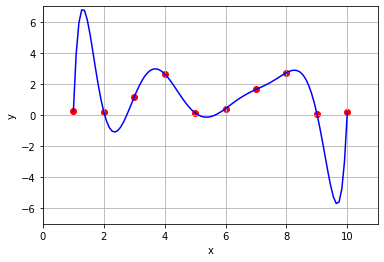

In [6]:
x = np.array([1,2,3,4,5,6,7,8,9,10])
y = np.array([0.26,0.2,1.17,2.65,0.14,0.42,1.65,2.73,0.09,0.21])

A = np.zeros((10,10),dtype=int)
B = np.zeros((10,1))

for i in range(10):
    B[i,0] = y[i]
    for j in range(10):
        A[i,j] = x[i]**(j)
        
coeffs = lag.SolveSystem(A,B)

x_fit = np.linspace(x[0],x[9],100)
y_fit = coeffs[0] + coeffs[1]*x_fit + coeffs[2]*x_fit**2 + coeffs[3]*x_fit**3 + coeffs[4]*x_fit**4 + coeffs[5]*x_fit**5 + coeffs[6]*x_fit**6 + coeffs[7]*x_fit**7 + coeffs[8]*x_fit**8 + coeffs[9]*x_fit**9 

fig,ax = plt.subplots()

ax.scatter(x,y,color='red');
ax.plot(x_fit,y_fit,'b');
ax.set_xlim(0,11);
ax.set_ylim(-7,7);
ax.set_xlabel('x');
ax.set_ylabel('y');
ax.grid(True);

Judging by the graph of the polynomial, it looks like the curve takes on a value of about 2.5 when $x = 3.5$ and a value of about 1 when $x = 4.5$.

Although this method of finding a polynomial that passes through all our data points provides a nice smooth curve, it doesn't match our intuition of what the curve should look like. The curve drops below zero between the ninth and tenth measurement, indicating a negative density. But this is impossible, since we can't have a negative number of hares! It also rises much higher between the first and second measurement than the data points alone seem to suggest.